In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

#### Function to train primitive neural network for XOR problem classification

In [16]:
def trainNetwork(x: np.ndarray, y: np.ndarray, lrn_rate=0.01, epochs=100):
    # Sigmoid activation function and it's derivative
    sigmoid = lambda x: 1 / (1 + np.exp(-x))
    sigmoid_derivative = lambda x: x * (1 - x)
    # Initialize neural network's weights
    weights_hidden = np.random.uniform(size=(2, 2))
    weights_output = np.random.uniform(size=(2, 1))
    # Initialize neural network's biases
    bias_hidden = np.zeros((1, 2))
    bias_output = np.zeros((1, 1))
    # Train the network for specififed amount of epochs
    for _ in range(epochs):
        # Simple forward pass
        hidden_output = sigmoid(np.dot(x, weights_hidden) + bias_hidden)
        output = sigmoid(np.dot(hidden_output, weights_output) + bias_output)
        # Simple backward pass
        error = y - output
        d_output = error * sigmoid_derivative(output)
        error_hidden = d_output.dot(weights_output.T)
        d_hidden = error_hidden * sigmoid_derivative(hidden_output)
        # Update weights using gradients
        weights_output += hidden_output.T.dot(d_output) * lrn_rate
        weights_hidden += x.T.dot(d_hidden) * lrn_rate
        # Update biases using gradients
        bias_output += np.sum(d_output, axis=0, keepdims=True) * lrn_rate
        bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lrn_rate
    return (weights_hidden, weights_output), (bias_hidden, bias_output)

#### Function to predict XOR using the trained network

In [17]:
def predictNetwork(x: np.ndarray, weights: tuple, biases: tuple):
    sigmoid = lambda x: 1 / (1 + np.exp(-x))
    # Simple forward pass
    hidden_output = sigmoid(np.dot(x, weights[0]) + biases[0])
    return sigmoid(np.dot(hidden_output, weights[1]) + biases[1]).flatten()

#### XOR "dataset" to predict

In [18]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

#### Training the network

In [19]:
weights, biases = trainNetwork(X, Y, 0.1, 10000)
print(f"Hidden Layer Weights: {weights[0]}")
print(f"Output Layer Weights: {weights[1]}")
print(f"Hidden Layer Biases: {biases[0]}")
print(f"Output Layer Biases: {biases[1]}")

Hidden Layer Weights: [[3.77876719 5.77131988]
 [3.78345326 5.79331783]]
Output Layer Weights: [[-8.17262084]
 [ 7.55637468]]
Hidden Layer Biases: [[-5.79319383 -2.42207539]]
Output Layer Biases: [[-3.41823076]]


#### Function to visualize decision boundary

In [20]:
def plot_decision_boundary(X_orig: np.ndarray, y_orig: np.ndarray, weights: tuple, biases: tuple):
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    z = predictNetwork(grid_points, weights, biases)
    z = z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = plt.scatter(
        X_orig[:, 0], X_orig[:, 1], 
        c=y_orig.ravel(), cmap=plt.cm.coolwarm, 
        edgecolors='k', marker='o', s=100
    )
    plt.xlabel('Input 1 (X1)')
    plt.ylabel('Input 2 (X2)')
    plt.title('Neural Network Decision Boundary for XOR')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    scatter.legend_elements(prop="colors", alpha=0.8)
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.set_label('Predicted Class')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

#### Testing the network accuracy and visualizing decision boundary

Accuracy: 1.0


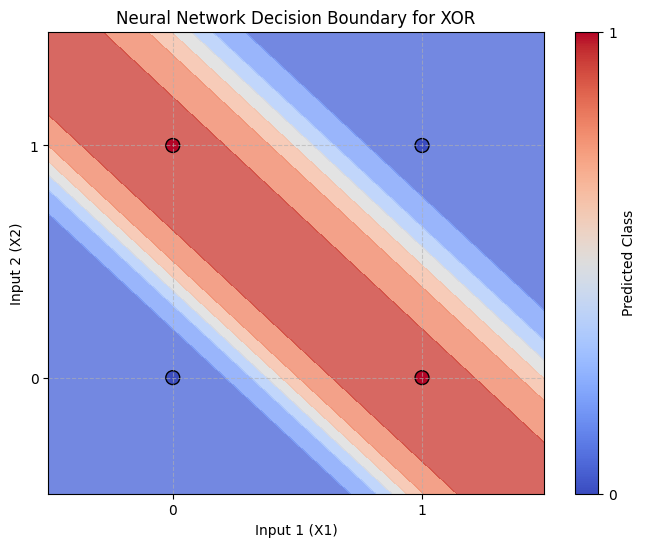

In [21]:
predictions = np.array([predictNetwork(x, weights, biases) for x in X]) 
print(f"Accuracy: {np.mean(Y == np.round(predictions))}")
plot_decision_boundary(X, Y, weights, biases)